# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[rule_data.phase == 'high'][:30]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
0,13885,high,0,"[0, 1]","[3, 0]",NaN,"[3, 0]","[0, 1]",NaN,NaN,"[3, 0]",NaN,NaN
3,14239,high,0,"[3, 0]","[1, 0]",NaN,"[1, 3]","[3, 0]",NaN,NaN,NaN,"[1, 0]","[1, 3]"
4,16849,high,0,"[1, 2]","[3, 0]",NaN,"[2, 0]","[1, 2]",NaN,NaN,NaN,"[3, 0]","[2, 0]"
7,23638,high,0,"[0, 1]","[0, 2]",NaN,"[0, 2]","[0, 1]",NaN,NaN,"[0, 2]",NaN,NaN
8,24817,high,0,"[3, 0]","[2, 0]",NaN,"[2, 3]","[3, 0]",NaN,NaN,NaN,"[2, 0]","[2, 3]"
10,24964,high,0,"[2, 3]","[1, 0]",NaN,"[1, 0]","[2, 3]",NaN,NaN,"[1, 0]",NaN,NaN
13,24979,high,0,"[2, 3]","[3, 2]",NaN,"[3, 2]","[2, 3]",NaN,NaN,"[3, 2]",NaN,NaN
15,26230,high,0,"[2, 3]","[2, 0]",NaN,"[2, 0]","[2, 3]",NaN,NaN,"[2, 0]",NaN,NaN
16,26641,high,0,"[1, 2]","[2, 1]",NaN,"[2, 1]","[1, 2]",NaN,NaN,"[2, 1]",NaN,NaN
19,26770,high,0,"[0, 1]","[1, 3]",NaN,"[2, 3]","[0, 1]",NaN,NaN,NaN,"[1, 3]","[2, 3]"


In [4]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,z_rt,rt_zz_low,rt_zz_high,chance_performer,inattentives,psych_disorder,head_trauma
0,797.865,0,85.0,learning,297,2422963,0.0-77.0-0.0,high,0.0,0.0,...,0,0,6.683192,1.325479,2.878924,2.878924,False,False,False,False
1,654.720,0,73.0,learning,298,2423619,0.0-77.0-1.0,high,0.0,0.0,...,0,0,6.485734,1.001916,2.878924,2.878924,False,False,False,False
2,1317.900,0,79.0,learning,299,2424938,0.0-77.0-2.0,high,0.0,0.0,...,0,0,7.184553,2.147032,2.878924,2.878924,False,False,False,False
3,276.305,0,80.0,learning,300,2425216,0.0-77.0-3.0,high,0.0,0.0,...,0,0,5.625118,-0.408328,2.878924,2.878924,False,False,False,False
4,823.310,0,85.0,learning,302,2426546,0.0-78.0-0.0,high,0.0,1.0,...,0,0,6.714547,1.376858,2.448594,2.448594,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237268,193.665,0,80.0,transfer,5315,1992663,0.0-1118.0-3.0,low,7.0,23.0,...,0,0,5.271280,0.013623,-0.223933,-0.223933,False,False,False,False
237269,134.030,0,80.0,transfer,5317,1993311,0.0-1119.0-0.0,low,7.0,24.0,...,0,0,4.905497,-0.362680,-0.249835,-0.249835,False,False,False,False
237270,101.775,0,85.0,transfer,5318,1993420,0.0-1119.0-1.0,low,7.0,24.0,...,0,0,4.632542,-0.643485,-0.249835,-0.249835,False,False,False,False
237271,93.150,0,73.0,transfer,5319,1993520,0.0-1119.0-2.0,low,7.0,24.0,...,0,0,4.544889,-0.733659,-0.249835,-0.249835,False,False,False,False


# Results

## Learning curves

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\2_LearnCurves_Trial_all.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152050 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152050 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152050 rows containing non-finite values.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\layer.py:372: PlotnineWarning: stat_summary : Removed 152050 rows containing non-finite values.


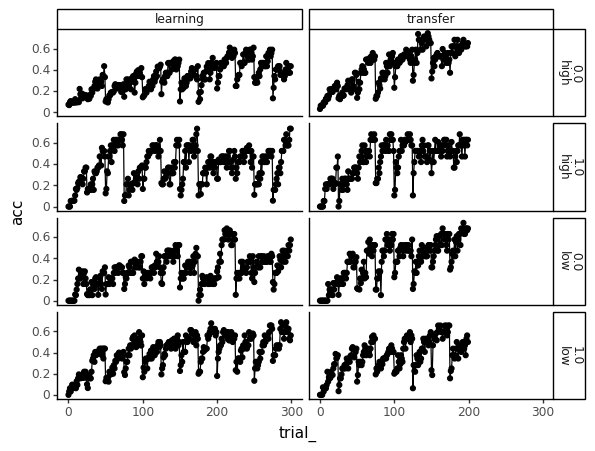

<ggplot: (136728113839)>

In [5]:
# Learning curves, averaging over goal stars 
def plot_LearnCurves_Trial(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial_', 'acc'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase + phaseNum ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '2_LearnCurves_Trial{}.png'.format(suf)))
    
    return g

# Use
learn_curves = plot_LearnCurves_Trial(all_data, '_all')
learn_curves

## Time frame for learning low / high rules

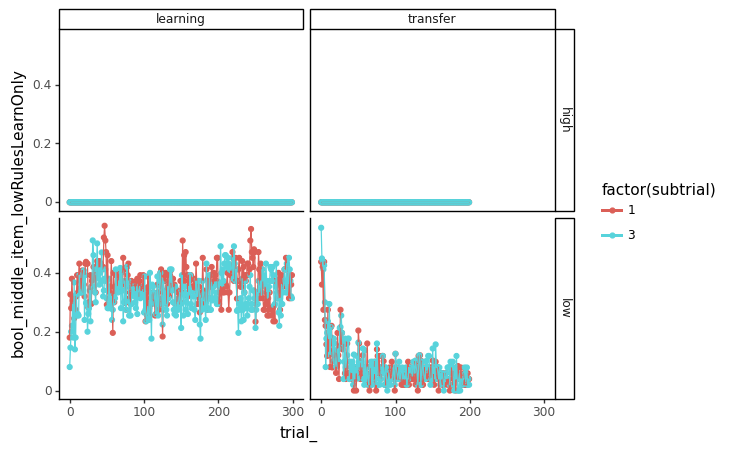

<ggplot: (136633883549)>


In [6]:
subj_dat = all_data.loc[all_data['subtrial'].isin([1, 3])].groupby(['sid', 'phase', 'trial_type', 'trial_', 'subtrial']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial_', 'bool_middle_item_lowRulesLearnOnly', color='factor(subtrial)'))
     + gg.stat_summary(fun_y=np.mean, geom='point')
     + gg.stat_summary(fun_y=np.mean, geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
# g.save(os.path.join(plot_dir, '102_middleItemsLearnoverTrial.png'))

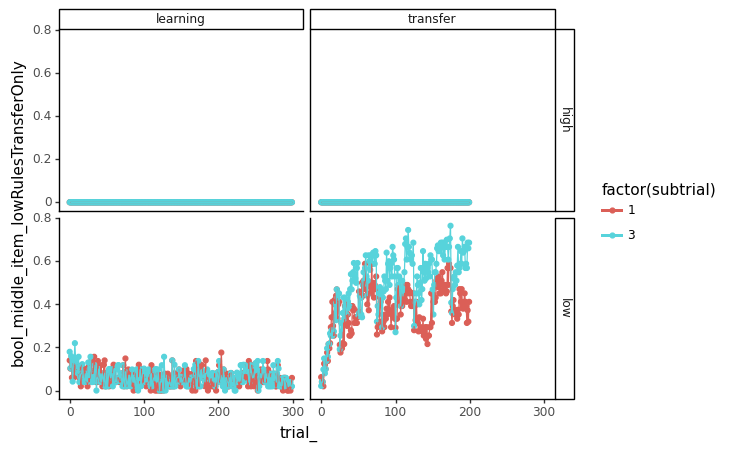

<ggplot: (136633883549)>


In [7]:
g += gg.aes(y='bool_middle_item_lowRulesTransferOnly')
print(g)

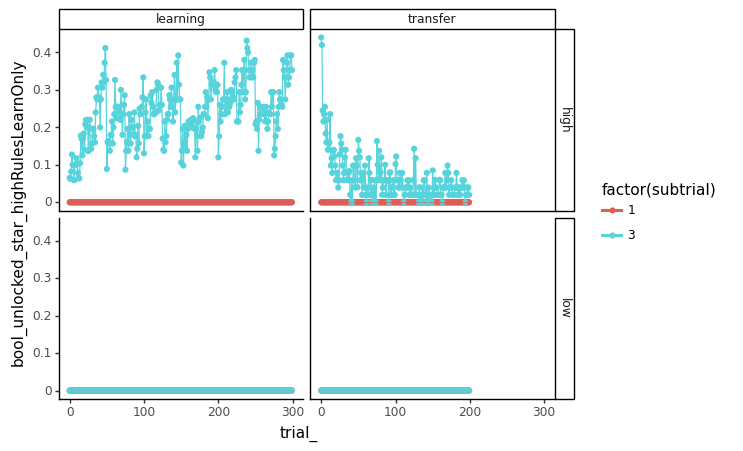

<ggplot: (136633883549)>


In [8]:
subj_dat = all_data.loc[all_data['subtrial'] == 3].groupby(['sid', 'phase', 'trial_type', 'trial_', 'subtrial']).aggregate('mean').reset_index()

g += gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
print(g)

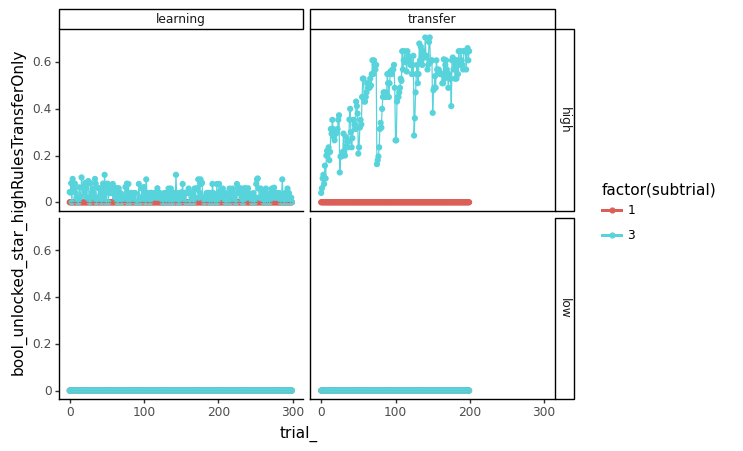

<ggplot: (136633883549)>


In [9]:
g += gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
print(g)

## Overall rules in training / transfer high / low

In [10]:
# # Hypothesis: Previous rules (high-level or low-level) persist significantly after they stop being valuable
# # (compared to baseline of not-yet-learned rules). There is a difference between high- and low-level (especially
# # early-on, i.e., in the first few blocks).
# g = (gg.ggplot(item_sum_dat, gg.aes('trial_type', color='factor(sid)', group='factor(sid)'))
#      + gg.geom_point()
#      + gg.geom_line()
#      + gg.facet_grid('phaseNum ~ phase')
#     )

# for col in goal_cols:
#     name = col.split('_')[-1]
#     g_col = g + gg.aes(y=col)
#     g_col.save(os.path.join(plot_dir, '8_Performance{}.png'.format(name)))
#     print(g_col)

## Forgetting of old rules and learning of new rules during transfer

In [11]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
sum_rules = all_data.loc[all_data.subtrial.isin([1, 3]), id_cols + goal_cols].groupby(id_cols).aggregate('mean').reset_index()
sum_rules = sum_rules.melt(id_vars=id_cols, var_name='rule', value_name='acc')
sum_rules.loc[sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]), 'acc'] *= 2
sum_rules

NameError: name 'goal_cols' is not defined

In [ ]:
# Hypothesis: middle-layer items are easier (faster) to learn, but harder (slower) to unlearn than high-level stars
# Reason: There is a difference in the level of abstraction. The deeper down, the harder to unlearn. Maybe only
# the top-level is still malleable.
g = (gg.ggplot(gg.aes('block', 'acc', color='rule'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(ylim=(0, 1))
     + gg.facet_grid('phaseNum ~ phase + trial_type')
    )

g_high = g
g_high.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]) &
    (sum_rules.phase == 'high') #& (sum_rules.trial_type == 'transfer')
]
g_high.save(os.path.join(plot_dir, '10_ForgettingRelearningHighRules.png'))
print(g_high)

g_low = g
g_low.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'low' in c]) &
    (sum_rules.phase == 'low') #& (sum_rules.trial_type == 'transfer')
]
g_low.save(os.path.join(plot_dir, '10_ForgettingRelearninglowRules.png'))
print(g_low)